# Selenium 연습문제

In [1]:
# 윈도우 ver
# pip install selenium==4.9.0

     ---------------------------------------- 6.5/6.5 MB 3.6 MB/s eta 0:00:00
  Obtaining dependency information for urllib3[socks]~=1.26 from https://files.pythonhosted.org/packages/c5/05/c214b32d21c0b465506f95c4f28ccbcba15022e000b043b72b3df7728471/urllib3-1.26.16-py2.py3-none-any.whl.metadata
     ---------------------------------------- 48.4/48.4 kB 2.4 MB/s eta 0:00:00
  Obtaining dependency information for certifi>=2021.10.8 from https://files.pythonhosted.org/packages/4c/dd/2234eab22353ffc7d94e8d13177aaa050113286e93e7b40eae01fbf7c3d9/certifi-2023.7.22-py3-none-any.whl.metadata
  Using cached certifi-2023.7.22-py3-none-any.whl.metadata (2.2 kB)
Using cached certifi-2023.7.22-py3-none-any.whl (158 kB)
   ---------------------------------------- 143.1/143.1 kB 8.3 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.0.4
    Uninstalling urllib3-2.0.4:
      Successfully uninstalled urllib3-2.0.4
  Attempting uninstall: certifi
    Found existin

DEPRECATION: pandas 0.24.2 has a non-standard dependency specifier pytz>=2011k. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pandas or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
ERROR: Cannot uninstall 'certifi'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


In [68]:
driver.quit()

### 02-1. 데이터 가져오기

In [ ]:
# 에피소드 페이지에서 바로 시작
# from selenium import webdriver
# from selenium.webdriver.chrome.service import Service
# from selenium.webdriver.chrome.options import Options

# options = webdriver.ChromeOptions()

# prefs = {'download.default_directory':'/home/ckdal/dev_ws/EDA/data',
#          'download.prompt_for_download':False}
# options.add_experimental_option('prefs', prefs)

# url = "https://www.imdb.com/title/tt0898266/episodes"
# driver = webdriver.Chrome(service=Service("../driver/chromedriver"),
#                           options=options)
# driver.get(url)

In [49]:
# https://www.imdb.com/ 에서 시작
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options

options = webdriver.ChromeOptions()

prefs = {'download.default_directory':'/home/ckdal/dev_ws/EDA/data',
         'download.prompt_for_download':False}
options.add_experimental_option('prefs', prefs)

url = "https://www.imdb.com/"
driver = webdriver.Chrome(service=Service("../driver/chromedriver"),
                          options=options)

driver.get(url)

TypeError: __init__() got an unexpected keyword argument 'service'

In [69]:
# 윈도우 ver
# https://www.imdb.com/ 에서 시작
from selenium import webdriver

url = "https://www.imdb.com/"
# url = "https://www.imdb.com/title/tt0898266/episodes"
driver = webdriver.Chrome("C:\dev_ws\EDA\driver\chromedriver.exe")

driver.get(url)

In [38]:
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver import ActionChains
# import time

# Search 입력란을 찾아서 클릭하고,
search = driver.find_element(By.CLASS_NAME, "sc-idXgbr.iHkrUj.searchform__inputContainer")
search.click()
time.sleep(1)

# "The Big Bang Theory" 타이핑
typing = search.find_element(By.TAG_NAME, "input")
typing.send_keys("The Big Bang Theory")
time.sleep(1)

# 키보드 방향키로 바로 아래 것 선택하고 엔터 치기
ActionChains(driver).send_keys(Keys.ARROW_DOWN).send_keys(Keys.ENTER).perform()
time.sleep(2)

In [40]:
# Episode list 페이지에 접속
episodes = driver.find_element(By.CLASS_NAME, "ipc-title.ipc-title--base.ipc-title--section-title.ipc-title--on-textPrimary")
episodes_click = episodes.find_element(By.CLASS_NAME, "ipc-title-link-wrapper")
ActionChains(driver).move_to_element(episodes_click).click().perform()

In [12]:
# 시즌 찾아서 선택할 수 있도록 season_names 리스트 만들기
# 한가지 Episode list 페이지에서만 작동
# season = driver.find_element(By.ID, 'bySeason')
# season_list = season.find_elements(By.TAG_NAME, 'option')
# season_names = [year.text for year in season_list]
# print(season_names)  # 리스트 확인

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"css selector","selector":"[id="bySeason"]"}
  (Session info: chrome=109.0.5414.149)


In [70]:
# 시즌 찾아서 선택할 수 있도록 season_names 리스트 만들기
# 엘리먼트가 검출될 때까지 페이지 재접속
from selenium.webdriver.support.wait import WebDriverWait
from selenium.common.exceptions import NoSuchElementException

while True:
    try :
        season = driver.find_element(By.ID, 'bySeason')
        break
    except NoSuchElementException as n:
        print('엘리먼트를 찾을수 없으므로 재접속')
        driver.quit()
        url = "https://www.imdb.com/title/tt0898266/episodes"
        # 우분투 ver
        # driver = webdriver.Chrome(service=Service("../driver/chromedriver"),
        #                  options=options)
        # 윈도우 ver
        driver = webdriver.Chrome("C:\dev_ws\EDA\driver\chromedriver.exe")
        driver.get(url)
        driver.implicitly_wait(10)

season_list = season.find_elements(By.TAG_NAME, 'option')
season_names = [year.text for year in season_list]
print(season_names)  # 리스트 확인

엘리먼트를 찾을수 없으므로 재접속
엘리먼트를 찾을수 없으므로 재접속
엘리먼트를 찾을수 없으므로 재접속
['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']


In [ ]:
# 12개 시즌 모두 에피소드 이름, 평점, 상영일자 추출
from selenium.webdriver.support.wait import WebDriverWait
from tqdm.notebook import tqdm

# 빈 리스트 만들기
title_list = []
whatseason_list = []
date_list = []
rating_star_list = []

for year in tqdm(season_names):
    # 시즌 선택
    season = driver.find_element(By.ID, 'bySeason')
    season.send_keys(year)

    # 시즌 선택 후 페이지 로딩 걸림
    # time.sleep(5)
    driver.implicitly_wait(10)

    eplist = driver.find_element(By.CLASS_NAME, 'list.detail.eplist')

    # 이름 추출
    strong = eplist.find_elements(By.TAG_NAME, 'strong')
    title = [title.text for title in strong]
    # 상영일자 추출
    airdate = eplist.find_elements(By.CLASS_NAME, 'airdate')
    date = [date.text for date in airdate]
    # 평점 추출
    ipl = eplist.find_elements(By.CLASS_NAME, 'ipl-rating-star__rating')
    rating_star = [star.text for star in ipl]

    # 미리 만든 빈 리스트에 저장하기
    title_list.extend(title)  # 이름
    date_list.extend(date)  # 상영일자
    rating_star_list.extend(rating_star)  # 평점

    # 해당 시즌의 에피소드 갯수만큼, 시즌 숫자를 미리 만든 빈 시즌 리스트에 저장하기
    whatseason = [year for _ in range(len(title))]
    whatseason_list.extend(whatseason)

# 긁어온 평점 데이터의 None값과 'Rate' 필터링하기
rating_star_list = list(filter(None, rating_star_list))
rating_star_list = [x for x in rating_star_list if x != 'Rate']

# 잘 추출되었는지 확인
title_list, whatseason_list, date_list, rating_star_list

  0%|          | 0/12 [00:00<?, ?it/s]

(['Unaired Pilot',
  'Pilot',
  'The Big Bran Hypothesis',
  'The Fuzzy Boots Corollary',
  'The Luminous Fish Effect',
  'The Hamburger Postulate',
  'The Middle Earth Paradigm',
  'The Dumpling Paradox',
  'The Grasshopper Experiment',
  'The Cooper-Hofstadter Polarization',
  'The Loobenfeld Decay',
  'The Pancake Batter Anomaly',
  'The Jerusalem Duality',
  'The Bat Jar Conjecture',
  'The Nerdvana Annihilation',
  'The Pork Chop Indeterminacy',
  'The Peanut Reaction',
  'The Tangerine Factor',
  'The Bad Fish Paradigm',
  'The Codpiece Topology',
  'The Barbarian Sublimation',
  'The Griffin Equivalency',
  'The Euclid Alternative',
  'The Cooper-Nowitzki Theorem',
  'The Panty Piñata Polarization',
  'The Lizard-Spock Expansion',
  'The White Asparagus Triangulation',
  'The Vartabedian Conundrum',
  'The Bath Item Gift Hypothesis',
  'The Killer Robot Instability',
  'The Friendship Algorithm',
  'The Financial Permeability',
  'The Maternal Capacitance',
  'The Cushion Satura

In [ ]:
# 길이 확인
len(title_list), len(whatseason_list), len(date_list), len(rating_star_list)

(280, 280, 280, 280)

In [74]:
driver.close()

### 02-2. 시각화 전 데이터 전처리

In [82]:
# 데이터 프레임으로 만들기
import pandas as pd

data = {'Season': whatseason_list, 'Date': date_list, 'Title': title_list, 'Star Rating': rating_star_list}
df = pd.DataFrame(data)
df.head()

NameError: name 'whatseason_list' is not defined

In [ ]:
df.tail()

,Season,Date,title,Star Rating
275,12,25 Apr. 2019,The Decision Reverberation,7.1
276,12,2 May 2019,The Plagiarism Schism,7.2
277,12,9 May 2019,The Maternal Conclusion,7.9
278,12,16 May 2019,The Change Constant,9.0
279,12,16 May 2019,The Stockholm Syndrome,9.5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Season       280 non-null    object
 1   Date         280 non-null    object
 2   title        280 non-null    object
 3   Star Rating  280 non-null    object
dtypes: object(4)
memory usage: 8.9+ KB


In [ ]:
#  시즌과 평점 데이터는 갖고 놀기 좋게 float 데이터타입으로 바꾸기
df["Season"] = df["Season"].astype("float")
df["Star Rating"] = df["Star Rating"].astype("float")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Season       280 non-null    float64
 1   Date         280 non-null    object 
 2   title        280 non-null    object 
 3   Star Rating  280 non-null    float64
dtypes: float64(2), object(2)
memory usage: 8.9+ KB


In [ ]:
# 시각화 하기 전에 csv 파일로 한 번 저장
df.to_csv("../data/bigbang.csv", sep=",")

### 02-3. 시각화

In [85]:
# import pandas as pd
import numpy as np

# 코랩에서 matplot 하기 위해 구글 드라이브에서 csv 파일 읽어오기
# from google.colab import drive
# drive.mount('/content/drive')
# df = pd.read_csv("/content/drive/MyDrive/dev_ws/EDA/data/bigbang.csv", index_col=0)

# 저장한 csv 파일 읽어오기
df = pd.read_csv("../data/bigbang.csv", index_col=0)
df.head()

,Season,Date,Title,Star Rating
0,1.0,1 May 2006,Unaired Pilot,6.5
1,1.0,24 Sep. 2007,Pilot,8.2
2,1.0,1 Oct. 2007,The Big Bran Hypothesis,8.2
3,1.0,8 Oct. 2007,The Fuzzy Boots Corollary,7.6
4,1.0,15 Oct. 2007,The Luminous Fish Effect,8.0


In [86]:
# 시즌별 에피소드 갯수
ep_len = [df[df["Season"] == i].shape[0] for i in range(1, len(season_names)+1)]
season_names, ep_len

# 시즌별 에피소드 인덱스 리스트 만들기
season_ep_turn = []
for i in range(0, len(season_names)):
    for j in range(1, ep_len[i]+1):
        season_ep_turn.append(j)
len(season_ep_turn), season_ep_turn

# 시즌별 에피소드 인덱스 칼럼 추가하기
df["시즌별 에피소드 Index"] = season_ep_turn

# 칼럼 순서 바꾸기
df = pd.DataFrame(df, columns=["Season", "시즌별 에피소드 Index", "Date", "Title", "Star Rating"])
df.head()

,Season,시즌별 에피소드 Index,Date,Title,Star Rating
0,1.0,1,1 May 2006,Unaired Pilot,6.5
1,1.0,2,24 Sep. 2007,Pilot,8.2
2,1.0,3,1 Oct. 2007,The Big Bran Hypothesis,8.2
3,1.0,4,8 Oct. 2007,The Fuzzy Boots Corollary,7.6
4,1.0,5,15 Oct. 2007,The Luminous Fish Effect,8.0


In [87]:
df_pivot = pd.pivot_table(df, index=["Season"], columns=["시즌별 에피소드 Index"])
df_pivot.head()

Star Rating                                               ...  \
시즌별 에피소드 Index          1    2    3    4    5    6    7    8    9    10  ...   
Season                                                                   ...   
1.0                    6.5  8.2  8.2  7.6  8.0  7.9  8.3  8.1  8.2  8.0  ...   
2.0                    8.2  8.0  8.7  7.9  8.3  8.2  8.6  8.0  8.1  7.7  ...   
3.0                    8.3  7.8  8.1  8.0  8.3  7.4  7.8  8.9  8.3  8.4  ...   
4.0                    8.7  8.3  7.9  8.0  7.7  8.0  8.0  8.1  8.4  7.6  ...   
5.0                    8.0  8.0  7.7  7.8  8.0  7.5  8.5  7.6  8.1  7.9  ...   

                                                                  
시즌별 에피소드 Index   15   16   17   18   19   20   21   22   23   24  
Season                                                            
1.0             8.0  8.2  8.3  8.5  NaN  NaN  NaN  NaN  NaN  NaN  
2.0             8.8  8.1  8.1  8.1  8.1  7.9  8.5  8.1  8.2  NaN  
3.0             8.0  8.2  8.4  8.4  7.8  8.1  8.1  9.0  8.6  NaN  
4.0             7.7  7.8  7.9  8.1  8.0  8.2  8.2  7.8  8.0  8.5  
5.0             7.7  7.6  7.8  8.2  8.1  8.1  8.5  7.7  8.1  8.5  

[5 rows x 24 columns]

In [90]:
pip install koreanize-matplotlib

     ---------------------------------------- 7.9/7.9 MB 4.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: pandas 0.24.2 has a non-standard dependency specifier pytz>=2011k. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pandas or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


- 막대그래프로 시즌별 에피소드 몇 개 있는지 보고 싶어
- 선그래프로 시즌별 평균 평점 보고 싶어 
- 히트맵
- 가장 인기 있는 에피소드, 가장 인기 없던 에피소드 표시

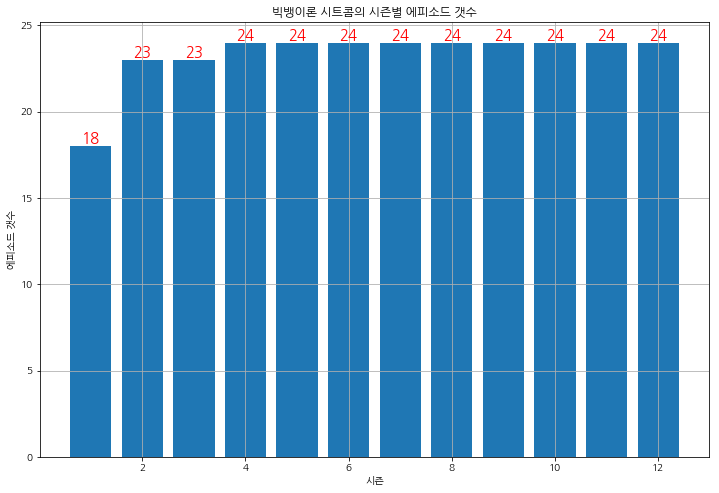

In [124]:
# 빅뱅이론 시트콤의 시즌별 에피소드 갯수
import matplotlib.pyplot as plt
import koreanize_matplotlib

plt.figure(figsize=(12,8))
plt.bar(season_names, ep_len)

for i, v in enumerate(season_names):
    plt.text(v, ep_len[i], ep_len[i],
             fontsize = 15, 
             color='red',
             horizontalalignment='center',
             verticalalignment='bottom')
    
plt.grid()
plt.title("빅뱅이론 시트콤의 시즌별 에피소드 갯수")
plt.xlabel("시즌")
plt.ylabel("에피소드 갯수")
plt.show()

In [114]:
pip install seaborn

     -------------------------------------- 293.3/293.3 kB 1.2 MB/s eta 0:00:00
  Obtaining dependency information for numpy!=1.24.0,>=1.17 from https://files.pythonhosted.org/packages/69/65/0d47953afa0ad569d12de5f65d964321c208492064c38fe3b0b9744f8d44/numpy-1.24.4-cp38-cp38-win_amd64.whl.metadata
  Obtaining dependency information for pandas>=0.25 from https://files.pythonhosted.org/packages/c3/6c/ea362eef61f05553aaf1a24b3e96b2d0603f5dc71a3bd35688a24ed88843/pandas-2.0.3-cp38-cp38-win_amd64.whl.metadata
  Obtaining dependency information for matplotlib!=3.6.1,>=3.1 from https://files.pythonhosted.org/packages/6d/f8/ff4acac6ea3f896146fd2a9f76dafb7c36973f2a329cae1d60a7c7252395/matplotlib-3.7.2-cp38-cp38-win_amd64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/b2/e5/6a7a6f2bdfcc0a235adf6f40be4f0ab5d23e65b766af1b2570c26b33d3b3/contourpy-1.1.0-cp38-cp38-win_amd64.whl.metadata
  Obtaining dependency information for fonttools>=

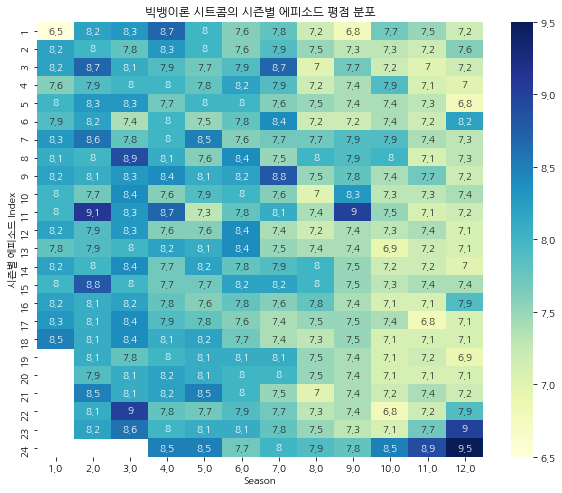

In [119]:
# 히트맵
# 인덱스는 에피소드 순서, 컬럼은 시즌, 안에 들어가는 데이터 값은 평점수
# import koreanize_matplotlib
import seaborn as sns

ratstar_pivot = pd.pivot_table(data=df, index='시즌별 에피소드 Index', columns='Season', values='Star Rating')Rating'])

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(data=ratstar_pivot, annot=True, cmap='YlGnBu')
plt.title("빅뱅이론 시트콤의 시즌별 에피소드 평점 분포")
plt.show();